In [1]:
import requests
from shapely.geometry import Point, Polygon, MultiPolygon
from datetime import datetime
import pandas as pd
import numpy as np
import geopandas as gpd
import contextily as ctx
import shapely
import os
import sqlite3 as sl
import itertools
from tqdm.notebook import tqdm
tqdm.pandas()

import logging
logging.getLogger().setLevel(logging.INFO) # DEBUG, INFO or WARN

from dotenv import load_dotenv
load_dotenv()

from bing_helper import Bing

DROOT = '../1-data/'
os.makedirs(os.path.join(DROOT, '3-interim', 'populationmasks'), exist_ok=True)

In [2]:
cities = pd.read_excel(os.path.join(DROOT, '1-research', 'cities.xlsx'), index_col=0)
cities.head(5)

,City,ctr_name,ctr_lat,ctr_lon,cells,Country,ID_HDC_G0
0,Vienna,Rathaus Wien,48.21080,16.35784,4381,AUT,3027
1,Graz,Hauptplatz Graz,47.06955,15.43383,1168,AUT,3000
2,Brussels,Brussels Town hall,50.84642,4.35232,3747,BEL,2135
3,Berlin,Old City Hall,52.51687,13.41160,5187,DEU,2851
4,Hamburg,Rathaus,53.55035,9.99232,4912,DEU,2531


In [3]:
KEY = os.environ['BING_API_KEY']
CACHE = os.path.join(DROOT, '3-interim', 'bing_cache.db')
client = Bing(KEY, CACHE)

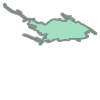

In [4]:
wew = client.con.execute('SELECT * FROM isochrone').fetchone()
shapely.wkt.loads(wew[5])

In [ ]:
for i, city in cities.iterrows():
    print(city.City)
    file = f'{city.ID_HDC_G0}.pcl'
    df = pd.read_pickle(os.path.join(DROOT, '3-interim', 'populationmasks', file))
    gdf = gpd.GeoDataFrame(df)
    
    origins  = enumerate(gdf.centroid.to_crs("EPSG:4326"))
    times    = range(5, 55, 10)
    modes_dt = [('driving', 'driving-peak', datetime(2023, 5, 2, 8, 30, 37)), 
                ('driving', 'driving',      datetime(2023, 5, 2, 13, 0, 37)), 
#                 ('transit', 'transit-peak', datetime(2023, 5, 2, 8, 30, 37)),
#                 ('transit', 'transit',      datetime(2023, 5, 2, 13, 0, 37)), 
#                 ('walking', 'walking',      datetime(2023, 5, 2, 8, 30, 37))
               ]
    
    batch      = list(itertools.product(origins, times, modes_dt))
    isochrones = client.get_isochrones_async(city.ID_HDC_G0, batch)

Vienna


Graz


Brussels


Berlin


Hamburg


Copenhagen


INFO:root:Currently fetching 2749-386-driving-45m-v0
INFO:root:Currently fetching 2749-387-driving-5m-v0
INFO:root:Currently fetching 2749-387-driving-15m-v0
INFO:root:Currently fetching 2749-387-driving-25m-v0
INFO:root:Currently fetching 2749-387-driving-35m-v0
INFO:root:Currently fetching 2749-387-driving-45m-v0


Aarhus


INFO:root:Currently fetching 2518-0-driving-5m-v0
INFO:root:Currently fetching 2518-0-driving-15m-v0
INFO:root:Currently fetching 2518-0-driving-25m-v0
INFO:root:Currently fetching 2518-0-driving-35m-v0
INFO:root:Currently fetching 2518-0-driving-45m-v0
INFO:root:Currently fetching 2518-1-driving-5m-v0
INFO:root:Currently fetching 2518-1-driving-15m-v0
INFO:root:Currently fetching 2518-1-driving-25m-v0
INFO:root:Currently fetching 2518-1-driving-35m-v0
INFO:root:Currently fetching 2518-1-driving-45m-v0
INFO:root:Currently fetching 2518-2-driving-5m-v0
INFO:root:Currently fetching 2518-2-driving-15m-v0
INFO:root:Currently fetching 2518-2-driving-25m-v0
INFO:root:Currently fetching 2518-2-driving-35m-v0
INFO:root:Currently fetching 2518-2-driving-45m-v0
INFO:root:Currently fetching 2518-3-driving-5m-v0
INFO:root:Currently fetching 2518-3-driving-15m-v0
INFO:root:Currently fetching 2518-3-driving-25m-v0
INFO:root:Currently fetching 2518-3-driving-35m-v0
INFO:root:Currently fetching 2518-3

INFO:root:Currently fetching 2518-31-driving-45m-v0
INFO:root:Currently fetching 2518-32-driving-5m-v0
INFO:root:Currently fetching 2518-32-driving-15m-v0
INFO:root:Currently fetching 2518-32-driving-25m-v0
INFO:root:Currently fetching 2518-32-driving-35m-v0
INFO:root:Currently fetching 2518-32-driving-45m-v0
INFO:root:Currently fetching 2518-33-driving-5m-v0
INFO:root:Currently fetching 2518-33-driving-15m-v0
INFO:root:Currently fetching 2518-33-driving-25m-v0
INFO:root:Currently fetching 2518-33-driving-35m-v0
INFO:root:Currently fetching 2518-33-driving-45m-v0
INFO:root:Currently fetching 2518-34-driving-5m-v0
INFO:root:Currently fetching 2518-34-driving-15m-v0
INFO:root:Currently fetching 2518-34-driving-25m-v0
INFO:root:Currently fetching 2518-34-driving-35m-v0
INFO:root:Currently fetching 2518-34-driving-45m-v0
INFO:root:Currently fetching 2518-35-driving-5m-v0
INFO:root:Currently fetching 2518-35-driving-15m-v0
INFO:root:Currently fetching 2518-35-driving-25m-v0
INFO:root:Curren

INFO:root:Currently fetching 2518-63-driving-35m-v0
INFO:root:Currently fetching 2518-63-driving-45m-v0
INFO:root:Currently fetching 2518-64-driving-5m-v0
INFO:root:Currently fetching 2518-64-driving-15m-v0
INFO:root:Currently fetching 2518-64-driving-25m-v0
INFO:root:Currently fetching 2518-64-driving-35m-v0
INFO:root:Currently fetching 2518-64-driving-45m-v0
INFO:root:Currently fetching 2518-65-driving-5m-v0
INFO:root:Currently fetching 2518-65-driving-15m-v0
INFO:root:Currently fetching 2518-65-driving-25m-v0
INFO:root:Currently fetching 2518-65-driving-35m-v0
INFO:root:Currently fetching 2518-65-driving-45m-v0
INFO:root:Currently fetching 2518-66-driving-5m-v0
INFO:root:Currently fetching 2518-66-driving-15m-v0
INFO:root:Currently fetching 2518-66-driving-25m-v0
INFO:root:Currently fetching 2518-66-driving-35m-v0
INFO:root:Currently fetching 2518-66-driving-45m-v0
INFO:root:Currently fetching 2518-67-driving-5m-v0
INFO:root:Currently fetching 2518-67-driving-15m-v0
INFO:root:Curren

Madrid


INFO:root:Currently fetching 1701-0-driving-5m-v0
INFO:root:Currently fetching 1701-0-driving-15m-v0
INFO:root:Currently fetching 1701-0-driving-25m-v0
INFO:root:Currently fetching 1701-0-driving-35m-v0
INFO:root:Currently fetching 1701-0-driving-45m-v0
INFO:root:Currently fetching 1701-1-driving-5m-v0
INFO:root:Currently fetching 1701-1-driving-15m-v0
INFO:root:Currently fetching 1701-1-driving-25m-v0
INFO:root:Currently fetching 1701-1-driving-35m-v0
INFO:root:Currently fetching 1701-1-driving-45m-v0
INFO:root:Currently fetching 1701-2-driving-5m-v0
INFO:root:Currently fetching 1701-2-driving-15m-v0
INFO:root:Currently fetching 1701-2-driving-25m-v0
INFO:root:Currently fetching 1701-2-driving-35m-v0
INFO:root:Currently fetching 1701-2-driving-45m-v0
INFO:root:Currently fetching 1701-3-driving-5m-v0
INFO:root:Currently fetching 1701-3-driving-15m-v0
INFO:root:Currently fetching 1701-3-driving-25m-v0
INFO:root:Currently fetching 1701-3-driving-35m-v0
INFO:root:Currently fetching 1701-3

INFO:root:Currently fetching 1701-31-driving-45m-v0
INFO:root:Currently fetching 1701-32-driving-5m-v0
INFO:root:Currently fetching 1701-32-driving-15m-v0
INFO:root:Currently fetching 1701-32-driving-25m-v0
INFO:root:Currently fetching 1701-32-driving-35m-v0
INFO:root:Currently fetching 1701-32-driving-45m-v0
INFO:root:Currently fetching 1701-33-driving-5m-v0
INFO:root:Currently fetching 1701-33-driving-15m-v0
INFO:root:Currently fetching 1701-33-driving-25m-v0
INFO:root:Currently fetching 1701-33-driving-35m-v0
INFO:root:Currently fetching 1701-33-driving-45m-v0
INFO:root:Currently fetching 1701-34-driving-5m-v0
INFO:root:Currently fetching 1701-34-driving-15m-v0
INFO:root:Currently fetching 1701-34-driving-25m-v0
INFO:root:Currently fetching 1701-34-driving-35m-v0
INFO:root:Currently fetching 1701-34-driving-45m-v0
INFO:root:Currently fetching 1701-35-driving-5m-v0
INFO:root:Currently fetching 1701-35-driving-15m-v0
INFO:root:Currently fetching 1701-35-driving-25m-v0
INFO:root:Curren

INFO:root:Currently fetching 1701-63-driving-35m-v0
INFO:root:Currently fetching 1701-63-driving-45m-v0
INFO:root:Currently fetching 1701-64-driving-5m-v0
INFO:root:Currently fetching 1701-64-driving-15m-v0
INFO:root:Currently fetching 1701-64-driving-25m-v0
INFO:root:Currently fetching 1701-64-driving-35m-v0
INFO:root:Currently fetching 1701-64-driving-45m-v0
INFO:root:Currently fetching 1701-65-driving-5m-v0
INFO:root:Currently fetching 1701-65-driving-15m-v0
INFO:root:Currently fetching 1701-65-driving-25m-v0
INFO:root:Currently fetching 1701-65-driving-35m-v0
INFO:root:Currently fetching 1701-65-driving-45m-v0
INFO:root:Currently fetching 1701-66-driving-5m-v0
INFO:root:Currently fetching 1701-66-driving-15m-v0
INFO:root:Currently fetching 1701-66-driving-25m-v0
INFO:root:Currently fetching 1701-66-driving-35m-v0
INFO:root:Currently fetching 1701-66-driving-45m-v0
INFO:root:Currently fetching 1701-67-driving-5m-v0
INFO:root:Currently fetching 1701-67-driving-15m-v0
INFO:root:Curren

INFO:root:Currently fetching 1701-95-driving-25m-v0
INFO:root:Currently fetching 1701-95-driving-35m-v0
INFO:root:Currently fetching 1701-95-driving-45m-v0
INFO:root:Currently fetching 1701-96-driving-5m-v0
INFO:root:Currently fetching 1701-96-driving-15m-v0
INFO:root:Currently fetching 1701-96-driving-25m-v0
INFO:root:Currently fetching 1701-96-driving-35m-v0
INFO:root:Currently fetching 1701-96-driving-45m-v0
INFO:root:Currently fetching 1701-97-driving-5m-v0
INFO:root:Currently fetching 1701-97-driving-15m-v0
INFO:root:Currently fetching 1701-97-driving-25m-v0
INFO:root:Currently fetching 1701-97-driving-35m-v0
INFO:root:Currently fetching 1701-97-driving-45m-v0
INFO:root:Currently fetching 1701-98-driving-5m-v0
INFO:root:Currently fetching 1701-98-driving-15m-v0
INFO:root:Currently fetching 1701-98-driving-25m-v0
INFO:root:Currently fetching 1701-98-driving-35m-v0
INFO:root:Currently fetching 1701-98-driving-45m-v0
INFO:root:Currently fetching 1701-99-driving-5m-v0
INFO:root:Curren

INFO:root:Currently fetching 1701-126-driving-35m-v0
INFO:root:Currently fetching 1701-126-driving-45m-v0
INFO:root:Currently fetching 1701-127-driving-5m-v0
INFO:root:Currently fetching 1701-127-driving-15m-v0
INFO:root:Currently fetching 1701-127-driving-25m-v0
INFO:root:Currently fetching 1701-127-driving-35m-v0
INFO:root:Currently fetching 1701-127-driving-45m-v0
INFO:root:Currently fetching 1701-128-driving-5m-v0
INFO:root:Currently fetching 1701-128-driving-15m-v0
INFO:root:Currently fetching 1701-128-driving-25m-v0
INFO:root:Currently fetching 1701-128-driving-35m-v0
INFO:root:Currently fetching 1701-128-driving-45m-v0
INFO:root:Currently fetching 1701-129-driving-5m-v0
INFO:root:Currently fetching 1701-129-driving-15m-v0
INFO:root:Currently fetching 1701-129-driving-25m-v0
INFO:root:Currently fetching 1701-129-driving-35m-v0
INFO:root:Currently fetching 1701-129-driving-45m-v0
INFO:root:Currently fetching 1701-130-driving-5m-v0
INFO:root:Currently fetching 1701-130-driving-15m-

INFO:root:Currently fetching 1701-157-driving-45m-v0
INFO:root:Currently fetching 1701-158-driving-5m-v0
INFO:root:Currently fetching 1701-158-driving-15m-v0
INFO:root:Currently fetching 1701-158-driving-25m-v0
INFO:root:Currently fetching 1701-158-driving-35m-v0
INFO:root:Currently fetching 1701-158-driving-45m-v0
INFO:root:Currently fetching 1701-159-driving-5m-v0
INFO:root:Currently fetching 1701-159-driving-15m-v0
INFO:root:Currently fetching 1701-159-driving-25m-v0
INFO:root:Currently fetching 1701-159-driving-35m-v0
INFO:root:Currently fetching 1701-159-driving-45m-v0
INFO:root:Currently fetching 1701-160-driving-5m-v0
INFO:root:Currently fetching 1701-160-driving-15m-v0
INFO:root:Currently fetching 1701-160-driving-25m-v0
INFO:root:Currently fetching 1701-160-driving-35m-v0
INFO:root:Currently fetching 1701-160-driving-45m-v0
INFO:root:Currently fetching 1701-161-driving-5m-v0
INFO:root:Currently fetching 1701-161-driving-15m-v0
INFO:root:Currently fetching 1701-161-driving-25m-

INFO:root:Currently fetching 1701-189-driving-5m-v0
INFO:root:Currently fetching 1701-189-driving-15m-v0
INFO:root:Currently fetching 1701-189-driving-25m-v0
INFO:root:Currently fetching 1701-189-driving-35m-v0
INFO:root:Currently fetching 1701-189-driving-45m-v0
INFO:root:Currently fetching 1701-190-driving-5m-v0
INFO:root:Currently fetching 1701-190-driving-15m-v0
INFO:root:Currently fetching 1701-190-driving-25m-v0
INFO:root:Currently fetching 1701-190-driving-35m-v0
INFO:root:Currently fetching 1701-190-driving-45m-v0
INFO:root:Currently fetching 1701-191-driving-5m-v0
INFO:root:Currently fetching 1701-191-driving-15m-v0
INFO:root:Currently fetching 1701-191-driving-25m-v0
INFO:root:Currently fetching 1701-191-driving-35m-v0
INFO:root:Currently fetching 1701-191-driving-45m-v0
INFO:root:Currently fetching 1701-192-driving-5m-v0
INFO:root:Currently fetching 1701-192-driving-15m-v0
INFO:root:Currently fetching 1701-192-driving-25m-v0
INFO:root:Currently fetching 1701-192-driving-35m-

INFO:root:Currently fetching 1701-220-driving-15m-v0
INFO:root:Currently fetching 1701-220-driving-25m-v0
INFO:root:Currently fetching 1701-220-driving-35m-v0
INFO:root:Currently fetching 1701-220-driving-45m-v0
INFO:root:Currently fetching 1701-221-driving-5m-v0
INFO:root:Currently fetching 1701-221-driving-15m-v0
INFO:root:Currently fetching 1701-221-driving-25m-v0
INFO:root:Currently fetching 1701-221-driving-35m-v0
INFO:root:Currently fetching 1701-221-driving-45m-v0
INFO:root:Currently fetching 1701-222-driving-5m-v0
INFO:root:Currently fetching 1701-222-driving-15m-v0
INFO:root:Currently fetching 1701-222-driving-25m-v0
INFO:root:Currently fetching 1701-222-driving-35m-v0
INFO:root:Currently fetching 1701-222-driving-45m-v0
INFO:root:Currently fetching 1701-223-driving-5m-v0
INFO:root:Currently fetching 1701-223-driving-15m-v0
INFO:root:Currently fetching 1701-223-driving-25m-v0
INFO:root:Currently fetching 1701-223-driving-35m-v0
INFO:root:Currently fetching 1701-223-driving-45m

In [ ]:
ax = gdf.plot()
gdf.iloc[40:50].plot(edgecolor=u'white', color=np.random.rand(3,), ax=ax)

In [ ]:
fig, axs = plt.subplots(ncols=5, figsize=(20, 4))
for i, t in enumerate(range(5, 55, 10)):
    stockholm = client.get_isochrone(STADSHUSET, f'stockholm-{t}', t, STARTDATE, 'driving')
    stockholm.plot(ax=axs[i])
    ctx.add_basemap(axs[i], crs="EPSG:4326")